# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [247]:
import pandas as pd
import zipfile 
from urllib.request import urlretrieve
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from geopandas.tools import sjoin
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline
#plt.style.use('seaborn')

In [19]:
#create a HW12 subdirectory in PUIDATA
if not os.path.exists(os.getenv('PUIDATA') + '/HW12'):
    os.mkdir(os.getenv('PUIDATA') + '/HW12')

if not os.path.exists('zip_code.zip') and not os.path.exists(os.getenv('PUIDATA') + '/HW12/' + 'zip_code.zip'):
    print('start downloading shapefile...')
    url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
    urlretrieve(url, 'zip_code.zip')
    print('done')
    if os.path.exists('zip_code.zip'):
        os.rename('zip_code.zip', os.getenv('PUIDATA') + '/HW12/' + 'zip_code.zip')
fzipshp = zipfile.ZipFile(os.getenv('PUIDATA') + '/HW12/' + 'zip_code.zip')
fzipshp.extractall(path=os.getenv('PUIDATA') + '/HW12/')

for files in fzipshp.namelist():
    if files.endswith('shp'):
        shp = files
nyczipsshp = gpd.read_file(os.getenv('PUIDATA') + '/HW12/' + shp)
print('GeoDataFrame zip_shp is ready')

GeoDataFrame zip_shp is ready


In [45]:
#create a HW12 subdirectory in PUIDATA
if not os.path.exists(os.getenv('PUIDATA') + '/HW12'):
    os.mkdir(os.getenv('PUIDATA') + '/HW12')
    
# define nyc zipcode
nyc_zip = np.array(nyczipsshp.ZIPCODE, dtype=int)

#download the census zipfiles, read each file, filter out unneeded columns and unrelated zipcodes, and merge all to one df
year_list = list(range(94, 100)) + list(range(0, 10)) + list(range(10, 15))
year = []                                                       
for i in year_list:
    if i < 10:
        i = '0' + str(i)
        year.append(i)
    else:
        i = str(i)
        year.append(i)

init_df = False
for i in year:
    fname = 'zbp' + i + 'totals.zip'

    # check if files are in the folder
    if not os.path.exists(os.getenv('PUIDATA') + '/HW12/' + fname):
        print('start downloading zbp_{:s}'.format(i))
        url = 'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/' + fname
        urlretrieve(url, fname)
        print('done')
        os.rename(fname, os.getenv('PUIDATA') + '/HW12/' + fname)
        
    # read files
    zf = zipfile.ZipFile(os.getenv('PUIDATA') + '/HW12/' + fname)
    try:
        df_ = pd.read_csv(zf.open(fname.replace('.zip','.txt')), index_col='zip')
        
        # filter out unneeded columns and unrelated zipcodes
        df_ = df_.loc[df_.index.isin(nyc_zip)].loc[:,['est']].rename(columns={'est': 'est_' + i})
        
    except ValueError:
        df_ = pd.read_csv(zf.open(fname.replace('.zip','.txt')), index_col='ZIP')
        df_.index.rename('zip', inplace=True)
        
        # filter out unneeded columns and unrelated zipcodes
        df_ = df_.loc[df_.index.isin(nyc_zip)].loc[:,['EST']].rename(columns={'EST': 'est_' + i})
    
    # merge all to one df
    if init_df == False:
        df_est = df_.copy()
        init_df = True
    else:
        df_est = df_est.join(df_)
print('Combined DataFrame df_est is ready')

Combined DataFrame df_est is ready


In [46]:
print(df_est.shape)
df_est.head()

(240, 21)


,est_94,est_95,est_96,est_97,est_98,est_99,est_00,est_01,est_02,est_03,...,est_05,est_06,est_07,est_08,est_09,est_10,est_11,est_12,est_13,est_14
zip,,,,,,,,,,,,,,,,,,,,,
10001,6999,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
10002,1784,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
10003,3256,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
10004,1115,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
10005,1076,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


In [21]:
nyczipsshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [97]:
def standardizer(df):
    '''Function:
    return a standardized dataset
    
    '''
    df_ = df.copy()
    for i in range(df.shape[0]):
        df_.iloc[i] = (df_.iloc[i] - df_.iloc[i].mean()) / df_.iloc[i].std()
    return df_

In [ ]:
est_nml = standardizer(df_est)
est_nml.dropna(inplace=True)
est_nml.shape

In [88]:

#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")

print("number of NYC zip codes:", len(nyczips))
nyczipsshp.ZIPCODE = nyczipsshp.ZIPCODE.astype(int)

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [114]:
csb = est_nml.merge(nyczipsshp, how='left', right_on='ZIPCODE', left_index=True)

In [125]:
csb = gpd.GeoDataFrame(csb)

In [117]:
csb.set_index('ZIPCODE', inplace=True)

In [167]:
vals = csb.iloc[:, :21]

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

### The map of the clusters may look something like this

In [241]:
#cluster with kmeans
nc = 5
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


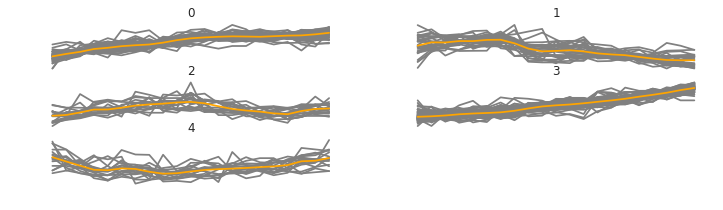

In [231]:
fig, axes = plt.subplots(3, 2, figsize=(12,3))
axes[-1,-1].set_axis_off()

for i, ax in enumerate(axes.flat[:-1]):
    ts_ki = vals.assign(cl=km.labels_).loc[vals.assign(cl=km.labels_).cl == i]
    #best fit line
    x = range(21)
    z = np.polyfit(x, ts_ki.iloc[:, :-1].mean(0), 15)
    p = np.poly1d(z)

    for r in range(ts_ki.shape[0]):
        ax.plot(x, ts_ki.iloc[r, 0:-1], 'grey')
        ax.set_axis_off()
        ax.set_title(i)
    ax.plot(x, p(x), 'orange')

### Figure 1: the plots capture the trend of time series in each cluster. The orange lines are the best fit lines for each cluster.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


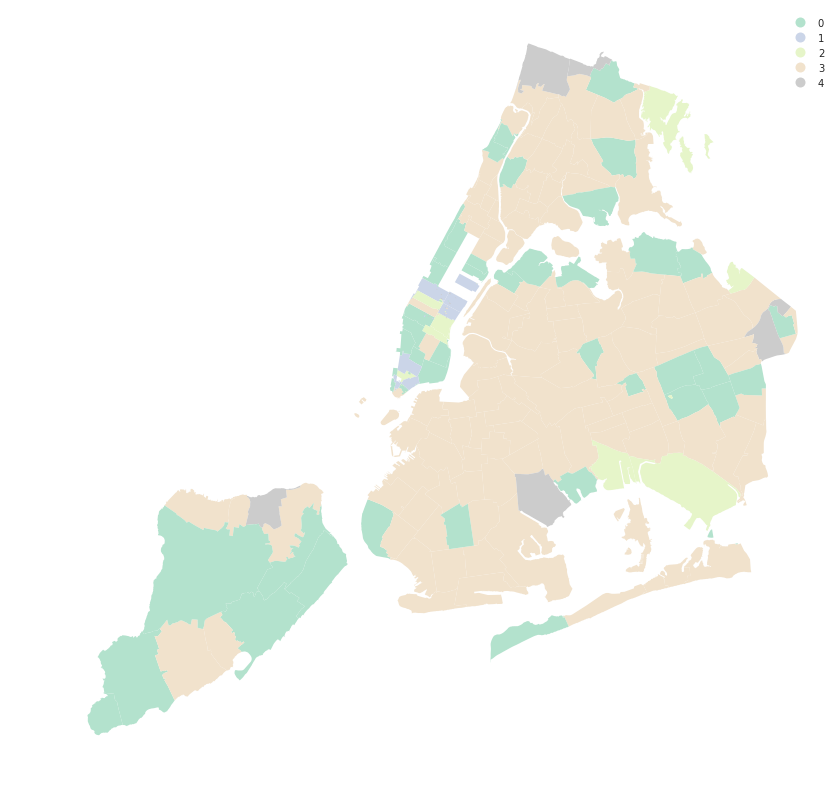

In [243]:
fig, ax= plt.subplots(1,1, figsize=(14,14))
csb.assign(cl=km.labels_).plot(column='cl', cmap='Pastel2', categorical=True, legend=True, ax=ax)
ax.set_axis_off()

### Figure 2: This graph shows the 5 clustered classes based on the establishment values. The majority of Brooklyn, Bronx, and Queens are class 3, and a large portion of Staten Island is Class 0. Manhattan is a mixture of all classes.

### Figure 3: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

In [244]:
#cluster with kmeans
nc = 7
km = KMeans(n_clusters=nc, random_state=444).fit(vals)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


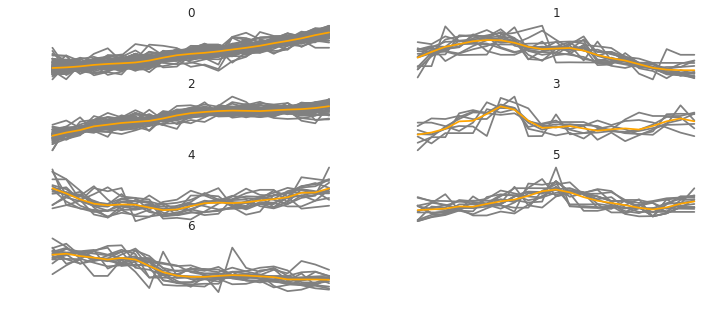

In [235]:
fig, axes = plt.subplots(4, 2, figsize=(12,5))
axes[-1,-1].set_axis_off()

for i, ax in enumerate(axes.flat[:-1]):
    ts_ki = vals.assign(cl=km.labels_).loc[vals.assign(cl=km.labels_).cl == i]
    #best fit line
    x = range(21)
    z = np.polyfit(x, ts_ki.iloc[:, :-1].mean(0), 15)
    p = np.poly1d(z)

    for r in range(ts_ki.shape[0]):
        ax.plot(x, ts_ki.iloc[r, 0:-1], 'grey')
        ax.set_axis_off()
        ax.set_title(i)
    ax.plot(x, p(x), 'orange')

### Figure 3: the plots capture the trend of time series in each cluster. The orange lines are the best fit lines for each cluster.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


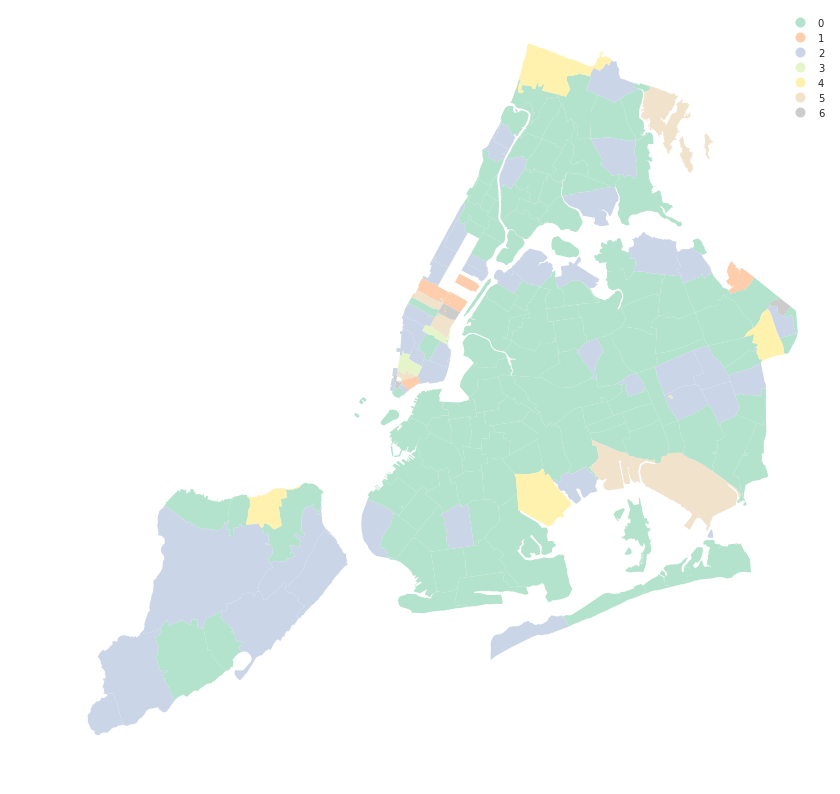

In [245]:
fig, ax= plt.subplots(1,1, figsize=(14,14))
csb.assign(cl=km.labels_).plot(column='cl', cmap='Pastel2', categorical=True, legend=True, ax=ax)
ax.set_axis_off()

### Figure 4: This graph shows the 7 clustered classes based on the establishment values. The clustering pattern is very similar to previous 5 clusters' pattern.

### Figure 9: 
As figures 3, 5, 7 for hierarchical agglomerative clustering in 7 clusters, with smoothed time series

# If you want to use agglomerative clustering

In [249]:
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))



### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


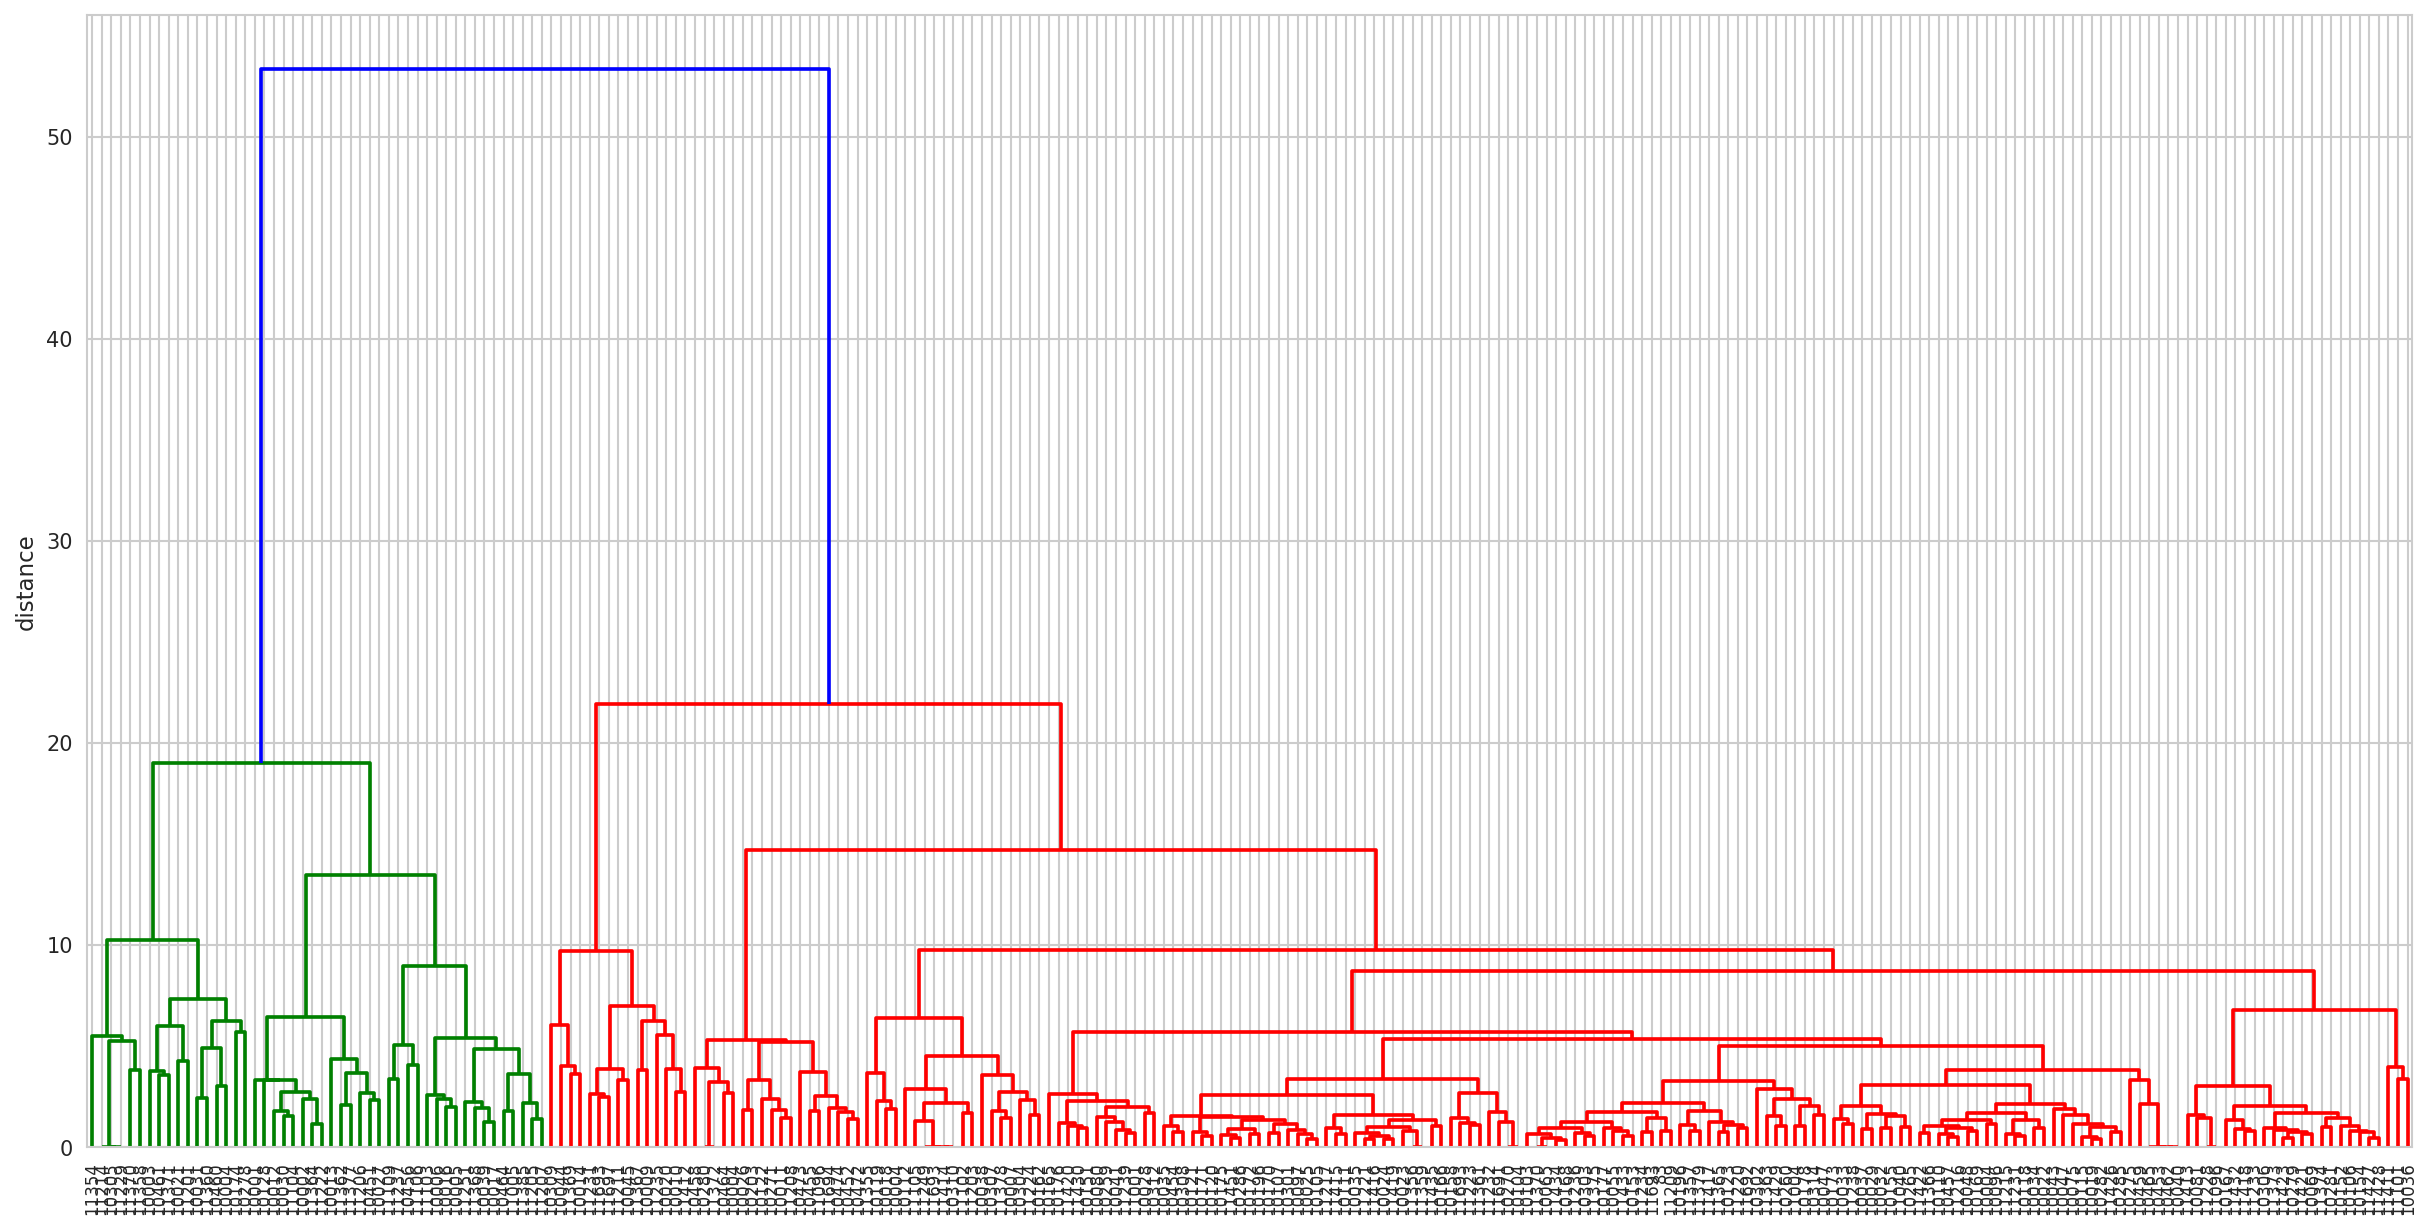

In [258]:
import scipy.cluster as scp
fig = plt.figure(figsize=(20,10), dpi=150)
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = nyc_zip,
                               leaf_rotation=90,  # rotates the x axis labels
                               leaf_font_size=8)  # font size for the x axis labels)

